# **3. Breve introducción a la mecánica cuántica**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

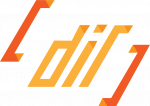

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=fc1d9ca2e9fb20705dc132445cbd990451d3e694ab568c47d3e028ea137aa631
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.9 MB/s eta 0:00:00


## **Postulados de la mecánica cuántica**

In [ ]:
# Instalar Qiskit si no lo tienes
# !pip install qiskit

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

### **1er postulado:** *El estado cuántico está representado por un vector en el espacio de Hilbert*

* En Qiskit: puedes crear qubits que representan vectores de estado.

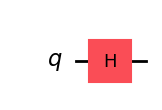

In [ ]:
# Crear un estado superpuesto: (|0⟩ + |1⟩)/√2
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.draw('mpl')

In [ ]:
# Obtener el vector de estado
state1 = Statevector.from_instruction(qc1)
print("Vector de estado:", state1)

Vector de estado: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [ ]:
Statevector(qc1).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

### **2do postulado:** *La evolución del estado cuántico es unitaria (cuando no se mide).*

* En Qiskit: puedes aplicar puertas cuánticas, que son operadores unitarios.

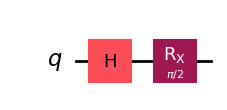

In [ ]:
# Aplicar una rotación unitaria Rx al estado
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.rx(np.pi/2, 0)  # Rotación en X
qc2.draw('mpl')

In [ ]:
Statevector(qc2).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

In [ ]:
Operator(qc2).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

### **3er postulado:** *El resultado de una medición corresponde a un valor propio del observable.*

* En Qiskit: puedes simular la medición de un qubit en la base computacional (observable $Z$).

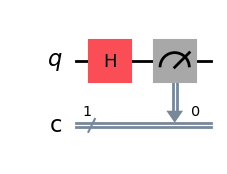

In [ ]:
# Medir el estado en la base computacional
qc3 = QuantumCircuit(1, 1)
qc3.h(0)
qc3.measure(0, 0)

qc3.draw('mpl')

* Cada medición colapsa el estado a un eigenestado del observable medido (por ejemplo, $|0⟩$ o $|1⟩$).

### **4to postulado:** *Probabilidad del resultado = |amplitud|²*

* En Qiskit: puedes observar estas probabilidades ejecutando el circuito varias veces (**shots**).

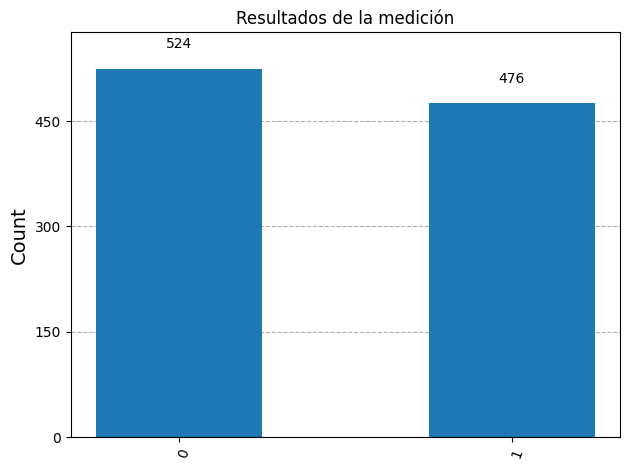

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 1000

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile((qc3), simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title = "Resultados de la medición")


* Si tienes una superposición, por ejemplo $(|0⟩ + |1⟩)/\sqrt{2}$, los resultados serán aproximadamente 50/50.

In [ ]:
# El estado |+> = (|0⟩ + |1⟩)/√2 debería dar ~50/50
print("Cuentas:", counts)
print("Probabilidades aproximadas:", {k: v/1000 for k, v in counts.items()})

Cuentas: {'0': 524, '1': 476}
Probabilidades aproximadas: {'0': 0.524, '1': 0.476}


### **5to postulado:** *El sistema compuesto se representa por el producto tensorial de sus subsistemas*

* En Qiskit: puedes crear sistemas de múltiples qubits y estados entrelazados.

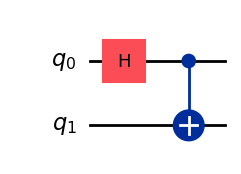

In [ ]:
# Crear una pareja de qubits entrelazados
qc5 = QuantumCircuit(2)
qc5.h(0)
qc5.cx(0, 1)
qc5.draw('mpl')

In [ ]:
Statevector(qc5).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

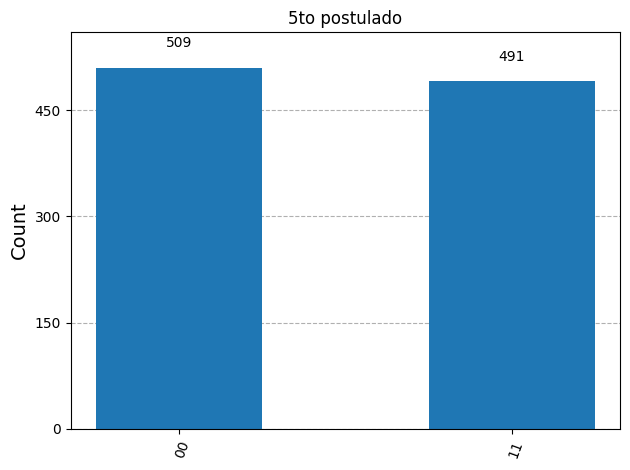

In [ ]:
# Medir ambos qubits
qc5.measure_all()

# Número de shots (veces que se ejecuta el circuito)
shots = 1000

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile((qc5), simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="5to postulado")

# **Información clásica**

La unidad más pequeña de información clásica es el **bit**. El cual es normalmente expresado como un símbolo que puede tomar 2 valores diferentes:

\begin{align*}
\mathbf{b} \in \{0, 1\}
\end{align*}

Conjuntos de $n$ **bits** se representan como cadenas de $n$ símbolos:
\begin{align*}
\mathbf{b}^n \in \{0, 1\}^n
\end{align*}

Por ejemplo, con $3$ **bits** podemos representar cualquiera de los siguientes $8$ elementos:

\begin{align*}
\mathbf{b}^3 = \{000,001, 010, 011, 100, 101, 110, 111\}
\end{align*}

In [ ]:
n = 3
[format(i, '0'+str(n)+'b') for i in range(1<<n)]

['000', '001', '010', '011', '100', '101', '110', '111']

Crucialmente, dado que cada **bit** sólo puede estar en uno de los dos estados $0$ o $1$, entonces $n$ **bits** pueden representar sólo **uno** de los $2^n$ elementos del conjunto $\{0, 1\}^n$.

# **Información cuántica**

La unidad más pequeña de información cuántica es el **qubit**. El cual es expresado como un vector que vive en $\mathbb{C}^2$:
\begin{align*}
\psi = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}, \space \space \space \alpha, \beta \in \mathbb{C}
\end{align*}

**¿Por qué un vector de números complejos?**
<div class="alert alert-block alert-success">
    <b>💡 Recuerda 💡</b>
    <br>
    Un <b>qubit</b> es un sistema cuántico simple de dos estados (o dos niveles), el cual se rige por las leyes de la mecánica cuántica.
</div>

## **Qubits y registros cuánticos**

Aunque podemos usar cualquier base ortonormal para escribir el estado de un qubit, en el cómputo cuántico normalmente usamos la llamada **base computacional** formada por los estados $|0\rangle$ y $|1 \rangle$:

\begin{align*}
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}; \space \space \space |1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align*}

Con los cuales podemos escribir cualquier qubit $|\psi\rangle$ como:

\begin{split}
|\psi\rangle & = \alpha |0 \rangle + \beta |1 \rangle\\
            & = \alpha \begin{bmatrix} 1 \\ 0 \end{bmatrix} +\beta \begin{bmatrix} 0 \\ 1 \end{bmatrix}=\begin{bmatrix} \alpha \\ \beta \end{bmatrix}
\end{split}

donde

\begin{equation*}
\vert\alpha\vert^2 + \vert\beta\vert^2 =1
\end{equation*}

## **Definición de las amplitudes de probabilidad del qubit**

Las amplitudes de probabilidad del qubit están dadas por:

\begin{equation*}
\alpha = \sqrt{\frac{2}{3}}, \quad \beta = \sqrt{\frac{1}{3}}
\end{equation*}

## **Normalización**

Para que el qubit sea un estado válido, debe cumplir la condición de normalización:

\begin{equation*}
|\alpha|^2 + |\beta|^2 = 1
\end{equation*}

Sustituyendo los valores de $\alpha$ y $\beta$:

\begin{equation*}
\left\vert\sqrt{\frac{2}{3}}\right\vert^2 + \left\vert\sqrt{\frac{1}{3}}\right\vert^2 = \frac{2}{3} + \frac{1}{3} = 1
\end{equation*}

## **Construcción del estado cuántico**

El estado del qubit en superposición se expresa como:

\begin{equation*}
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
\end{equation*}

Sustituyendo los valores de $\alpha$ y $\beta$:

\begin{equation*}
|\psi\rangle = \begin{bmatrix} \sqrt{2/3} \\ \sqrt{1/3} \end{bmatrix}
\end{equation*}

In [ ]:
import math

# Estados de la base computacional
base_computacional = {
    "|0>" : np.array([[1], [0]]),  # Vector columna
    "|1>" : np.array([[0], [1]]),
}

# Amplitudes del qubit
alpha = np.sqrt(2/3)
beta = np.sqrt(1/3)

# Verificar la normalización de amplitudes
amplitudes = [alpha, beta]
assert math.isclose(np.sum([x**2 for x in map(np.abs, amplitudes)]), 1.0)

# Construcción del estado |ψ⟩
qubit_psi = alpha * base_computacional["|0>"] + beta * base_computacional["|1>"]
print("Estado cuántico |ψ⟩:\n", qubit_psi)

# Verificación de la normalización con producto interno ⟨ψ|ψ⟩
qubit_psi_dagger = qubit_psi.conj().T  # Conjugado transpuesto (bra ⟨ψ|)
norma = np.dot(qubit_psi_dagger, qubit_psi).item()  # Producto interno ⟨ψ|ψ⟩

print("\nProducto interno ⟨ψ|ψ⟩ =", norma)

Estado cuántico |ψ⟩:
 [[0.81649658]
 [0.57735027]]

Producto interno ⟨ψ|ψ⟩ = 1.0


# **Notación de Dirac ("bra-ket")**

La **notación de Dirac**, también conocida como notación **bra-ket**, es una forma compacta y útil para representar estados cuánticos en el espacio de Hilbert. Los físicos usan esta notación para escribir los vectores columna, llamados **ket**, y los vectores fila, llamados **bra**:
\begin{align*}
\vert\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix},
\space \space \space
\langle\psi\vert = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}
\end{align*}


* Un $\textbf{estado cuántico}$ se representa como un $\vert\cdot\rangle$:
$$
\vert\psi\rangle
$$
    
* Su $\textbf{dual}$ (*transpuesta conjugada*) se representa como un $\langle\cdot\vert$:
$$
\langle\psi\vert
$$
    
* El $\textbf{producto interno}$ entre dos estados:
$$
\langle \phi \vert \psi \rangle
$$
    
* El $\textbf{producto externo}$ (operador proyector):
$$
\vert \psi \rangle \langle \phi \vert
$$

## **Ejemplo para un qubit**

$$
\vert 0 \rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix}, \quad
\vert 1 \rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix}.
$$

Un **qubit**, es una **superposición** de los estados base, es decir, un qubit puede ser expresado como la [combinación lineal](https://en.wikipedia.org/wiki/Linear_combination) de $\vert 0\rangle$ y $\vert 1\rangle$:

$$\vert \psi\rangle=\alpha\vert 0\rangle+\beta\vert 1\rangle$$

donde $\alpha$ y $\beta$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude). Cuando medimos este qubit, la probabiliadad de obtener el estado $\vert 0\rangle$ es de $|\alpha|^2$ y la probabilidad de obtener el estado $\vert 1\rangle$ es de $|\beta|^2$. Debiéndose cumplir:

$$|\alpha|^2 + |\beta|^2 = 1$$

### **Ejemplo:**

$$\vert\psi \rangle=\frac{\sqrt{3}}{2}\vert 0\rangle+\frac{1}{2}\vert 1\rangle=\left[ \begin{array}{c} \dfrac{\sqrt{3}}{2} \\\\ \dfrac{1}{2} \end{array} \right]$$

La probabilidad de observar el estado $\vert 0\rangle$ es de $\left|\dfrac{\sqrt{3}}{2}\right|^2=\dfrac{3}{4}$, que es $75\%$.
    
La probabilidad de observar el estado $\vert 1\rangle$ es de $\left|\dfrac{1}{2}\right|^2=\dfrac{1}{4}$, que es $25\%$.
    
La suma de las probabilidades para cada caso: $\dfrac{3}{4}+\dfrac{1}{4}=1$, que es $100\%$.</div>

### **Ejercicio:**

Para cada uno de los siguientes qubits. Si una medición es realizada, ¿cuál es la probalidad de que encontremos al qubit en el estado $\vert 0\rangle$? y  ¿cuál es la probalidad de que encontremos al qubit en el estado $\vert 1\rangle$?

1. $\vert\psi\rangle = \frac{i}{2}\vert 0\rangle +\frac{\sqrt{3}}{2}\vert 1\rangle$.

2. $\vert\psi\rangle = \frac{1+i}{\sqrt{3}}\vert 0\rangle +\frac{1}{\sqrt{3}}\vert 1\rangle$.

In [ ]:
def calcular_probabilidades(estado, base):
    """
    Calcula las probabilidades de un estado cuántico en la base computacional y verifica su conservación.

    Parámetros:
    estado: numpy array con los coeficientes del estado.
    base: lista con los nombres de los estados base.
    """
    probabilidades = np.abs(estado) ** 2

    print("Probabilidades en la base computacional:")
    for i, prob in enumerate(probabilidades):
        print(f"P({base[i]}) = {prob:.4f}")

    suma_probabilidades = np.sum(probabilidades)
    print(f"Suma de probabilidades: {suma_probabilidades:.4f}")
    if np.isclose(suma_probabilidades, 1.0):
        print("La conservación de probabilidad se cumple.")
    else:
        print("Advertencia: la conservación de probabilidad no se cumple.")

In [ ]:
# Definir el estado |psi⟩ = i/2 |0> + np.sqrt(3)/2 |1>
alpha = 1j / 2
beta = np.sqrt(3) / 2
# Base computacional para 2 niveles: |0⟩, |1⟩
base = ["|0⟩", "|1⟩"]
# Representar el estado en un vector de dimensión 2
estado = np.array([beta, alpha])
# Calcular y mostrar probabilidades
calcular_probabilidades(estado, base)

Probabilidades en la base computacional:
P(|0⟩) = 0.7500
P(|1⟩) = 0.2500
Suma de probabilidades: 1.0000
La conservación de probabilidad se cumple.


In [ ]:
# Definir el estado |psi⟩ = (1+i)/np.sqrt(3) |0> + 1/np.sqrt(3) |1>
alpha = (1+1j)/np.sqrt(3)
beta = 1/np.sqrt(3)
# Base computacional para 2 niveles: |0⟩, |1⟩
base = ["|0⟩", "|1⟩"]
# Representar el estado en un vector de dimensión 2
estado = np.array([beta, alpha])
# Calcular y mostrar probabilidades
calcular_probabilidades(estado, base)

Probabilidades en la base computacional:
P(|0⟩) = 0.3333
P(|1⟩) = 0.6667
Suma de probabilidades: 1.0000
La conservación de probabilidad se cumple.


# **Entrelazamiento**

## **Estados de Bell**

Los $\textbf{estados de Bell}$ son cuatro estados cuánticos de dos qubits que están $\textbf{máximamente entrelazados}$. Forman una base ortonormal del espacio de Hilbert de dos qubits (**dimensión 4**) y son fundamentales en:


* Teoría del entrelazamiento
* Teleportación cuántica
* Criptografía cuántica

$\textbf{Definición}:$

\begin{aligned}
\vert \Phi^+ \rangle &= \frac{1}{\sqrt{2}} \left( \vert 00 \rangle + \vert 11 \rangle \right) \\
\vert \Phi^- \rangle &= \frac{1}{\sqrt{2}} \left( \vert 00 \rangle - \vert 11 \rangle \right) \\
\vert \Psi^+ \rangle &= \frac{1}{\sqrt{2}} \left( \vert 01 \rangle + \vert 10 \rangle \right) \\
\vert \Psi^- \rangle &= \frac{1}{\sqrt{2}} \left( \vert 01 \rangle - \vert 10 \rangle \right)
\end{aligned}

$\textbf{Propiedades}$

* No pueden escribirse como producto de dos estados individuales (**no son separables**).
* Si se mide un qubit, el otro colapsa a un estado perfectamente correlacionado.


###**Ejemplo: $\vert \Phi^+ \rangle$**

Si dos qubits están en el estado

$$
\vert \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( \vert 00 \rangle + \vert 11 \rangle \right),
$$

entonces:

* Si se mide el primer qubit y el resultado es $\vert 0 \rangle$, el segundo colapsa a $\vert 0 \rangle$.
* Si se mide $\vert 1 \rangle$, el segundo colapsa a $\vert 1 \rangle$.
* Sin medición, el estado no puede describirse como la combinación de dos estados individuales: los qubits están $\textbf{entrelazados}$.

En la *base computacional*, **los estados de Bell** están dados por:

\begin{equation}
\vert 0 \rangle \otimes \vert 1 \rangle =
\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \cdot 0 \\ 1 \cdot 1 \\ 0 \cdot 0 \\ 0 \cdot 1 \end{bmatrix}
=
\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\end{equation}

Esto corresponde al estado $\vert 01 \rangle$.


## **Aplicaciones en Computación Cuántica**

El producto tensorial es clave para describir sistemas de varios qubits. Un estado general con **dos qubits** es:

\begin{equation}
\vert \psi \rangle = \alpha \vert 00 \rangle + \beta \vert 01 \rangle + \gamma \vert 10 \rangle + \delta \vert 11 \rangle
\end{equation}

donde $\alpha, \beta, \gamma, \delta$ son coeficientes complejos.


* $\textbf{Compuertas Cuánticas}$

Las $\textbf{compuertas cuánticas}$ también usan productos tensoriales. Por ejemplo, la puerta $\textbf{Hadamard}$ en un qubit es:

\begin{equation}
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{equation}

Si aplicamos $\textbf{Hadamard}$ a dos qubits independientes, usamos:

\begin{equation}
H \otimes H =
\frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{equation}

lo que da como resultado una transformación en el espacio de 4 dimensiones.

* $\textbf{Entrelazamiento cuántico}$

El $\textbf{entrelazamiento cuántico}$ surge del producto tensorial cuando los coeficientes de un estado no se pueden factorizar en productos de estados individuales. Por ejemplo

\begin{equation}
\vert \Phi^+ \rangle = \frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle)
\end{equation}

Este estado $\textbf{NO}$ se puede escribir como $\vert \psi \rangle \otimes \vert \phi \rangle$, lo que lo hace $\textbf{entrelazado}$.

## **Resumen**

1. El $\textbf{producto tensorial}$ permite construir estados cuánticos en sistemas compuestos.

2. Cada qubit adicional $\textbf{duplica}$ la dimensión del espacio de estados.

3. Es fundamental para $\textbf{compuertas cuánticas}$, $\textbf{entrelazamiento}$ y $\textbf{simulaciones cuánticas}$.


###**Ejemplo:**

Un sistema de $2$ qubits arbitrario, es una superposición de $2^2$ estados base, que podríamos representar con estados $|u_{i}\rangle$:
\begin{align*}
|\psi_{AB} \rangle = \alpha_1 |u_{1}\rangle + \alpha_2 |u_{2} \rangle + \alpha_3 |u_{3} \rangle + \alpha_4 |u_{4} \rangle  
\end{align*}

Cada uno de estos $|u_{i}\rangle$ es de hecho un estado base que se forma del producto tensorial ($\otimes$) de 2 qubits:
\begin{align*}
|u_{1} \rangle =|0\rangle \otimes |0 \rangle &= |0 \rangle |0 \rangle = |0,0 \rangle = |00 \rangle
\\
|u_{2} \rangle =|0\rangle \otimes |1 \rangle &= |0 \rangle |1 \rangle = |0,1 \rangle = |01 \rangle
\\
|u_{3} \rangle =|1\rangle \otimes |0 \rangle &= |1 \rangle |0 \rangle = |1,0 \rangle = |10 \rangle
\\
|u_{4} \rangle =|1\rangle \otimes |1 \rangle &= |1 \rangle |1 \rangle = |1,1 \rangle = |11 \rangle
\end{align*}

In [ ]:
# Estados base computacional
base_computacional = {
    "|0>": np.array([[1], [0]]),
    "|1>": np.array([[0], [1]]),
}

# Definir los kets
ket_0 = base_computacional["|0>"]
ket_1 = base_computacional["|1>"]

# Generar la base de 2 qubits con producto tensorial
base_2_qubits = {
    "|00>": np.kron(ket_0, ket_0),
    "|01>": np.kron(ket_0, ket_1),
    "|10>": np.kron(ket_1, ket_0),
    "|11>": np.kron(ket_1, ket_1),
}

# Imprimir la base de 2 qubits
print("Base Computacional para 2 Qubits:\n")
for estado, vector in base_2_qubits.items():
    print(f"{estado} =\n{vector}\n")

Base Computacional para 2 Qubits:

|00> =
[[1]
 [0]
 [0]
 [0]]

|01> =
[[0]
 [1]
 [0]
 [0]]

|10> =
[[0]
 [0]
 [1]
 [0]]

|11> =
[[0]
 [0]
 [0]
 [1]]



## **¿Los estados de Bell están entrelazados?**

**Representación en términos de productos tensoriales**

Los estados de Bell se pueden escribir como combinaciones lineales de los estados base $\{|0\rangle, |1\rangle\}$:

\begin{align}
|\beta_{00}\rangle &= \frac{1}{\sqrt{2}} \left( |0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle \right), \\
|\beta_{01}\rangle &= \frac{1}{\sqrt{2}} \left( |0\rangle \otimes |0\rangle - |1\rangle \otimes |1\rangle \right), \\
|\beta_{10}\rangle &= \frac{1}{\sqrt{2}} \left( |0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle \right), \\
|\beta_{11}\rangle &= \frac{1}{\sqrt{2}} \left( |0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle \right).
\end{align}

**Representación matricial usando el producto de Kronecker**

Expresando los estados en términos de matrices columna:

\begin{align}
|0\rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
\end{align}

Los estados de Bell en forma matricial quedan como:

\begin{align}
|\beta_{00}\rangle &= \frac{1}{\sqrt{2}}
\left(
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\otimes
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
+
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\right),
\\
|\beta_{01}\rangle &= \frac{1}{\sqrt{2}}
\left(
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\otimes
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
-
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\right),
\\
|\beta_{10}\rangle &= \frac{1}{\sqrt{2}}
\left(
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
+
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\otimes
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\right),
\\
|\beta_{11}\rangle &= \frac{1}{\sqrt{2}}
\left(
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
-
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\otimes
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\right).
\end{align}


Los estados de Bell en forma matricial son:

\begin{equation}
\vert\beta_{00} \rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix}
\end{equation}

\begin{equation}
\vert\beta_{01} \rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
0 \\
0 \\
-1
\end{bmatrix}
\end{equation}

\begin{equation}
\vert\beta_{10} \rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
0 \\
1 \\
1 \\
0
\end{bmatrix}
\end{equation}

\begin{equation}
\vert\beta_{11} \rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
0 \\
1 \\
-1 \\
0
\end{bmatrix}
\end{equation}

### **Separabilidad vs. Entrelazamiento**

Un estado **es separable** (no entrelazado) **si y solo si puede escribirse como el producto tensorial de dos qubits individuales:**

$$\vert\psi\rangle =(\alpha\vert 0\rangle +\beta\vert 1\rangle)\otimes (\gamma\vert 0\rangle +\delta\vert 1\rangle)$$

es decir

$$\vert\psi\rangle =\alpha\gamma\vert 00\rangle +\alpha\delta\vert 01\rangle +\beta\gamma\vert 10\rangle +\beta\delta\vert 11\rangle$$

Comparando con el estado general, esto implica:

$$a=\alpha\gamma,\quad b=\alpha\delta,\quad c=\beta\gamma,\quad d=\beta\delta.$$

Entonces

$$ad=\alpha\gamma\cdot\beta\delta,\qquad bc=\alpha\delta\cdot\beta\gamma.$$

De modo que:

$$ad=bc,$$

si el estado es **separable**.

### **Conclusión:**

* Si $ad=bc$ el estado es *separable* (no entrelazado).
* Si $ad\neq bc$ el estado es *entrelazado*.

### **Ejercicio:**

Verificar la condicion de separabilidad/entrelzamiento en los estados de Bell. Completa el código de abajo

In [ ]:
import numpy as np

# Definir los estados base
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

# Definir los estados de Bell en términos de productos tensoriales
bell_states = {
    "β00": (1/np.sqrt(2)) * (np.kron(ket_0, ket_0) + np.kron(ket_1, ket_1)),  # (|00> + |11>) / sqrt(2)
    "β01": (1/np.sqrt(2)) * (np.kron(ket_0, ket_0) - np.kron(ket_1, ket_1)),  # (|00> - |11>) / sqrt(2)
    "β10": (1/np.sqrt(2)) * (np.kron(ket_0, ket_1) + np.kron(ket_1, ket_0)),  # (|01> + |10>) / sqrt(2)
    "β11": (1/np.sqrt(2)) * (np.kron(ket_0, ket_1) - np.kron(ket_1, ket_0))   # (|01> - |10>) / sqrt(2)
}

In [ ]:
# Función para comprobar si el estado está entrelazado usando ad ≠ bc
def verificar_entrelazamiento(nombre, estado):
    # Extraer coeficientes (el estado es un vector columna, necesitamos a, b, c, d)
    a = estado[0, 0]
    b = estado[1, 0]
    c = estado[2, 0]
    d = estado[3, 0]

    # Calcular productos ad y bc
    ad = a * d
    bc = b * c

    # Estado está entrelazado si ad ≠ bc
    entrelazado = not np.isclose(ad, bc)

    # Imprimir resultado
    print(f"   Estado |{nombre}⟩:")
    print(f"   Coeficientes: a={a:.3f}, b={b:.3f}, c={c:.3f}, d={d:.3f}")
    print(f"   ad = {ad:.3f}, bc = {bc:.3f}")
    print(f"   ➝ ¿Está entrelazado? {'✅ Sí' if entrelazado else '❌ No'}\n")

# Comprobar el entrelazamiento de los 4 estados de Bell
for nombre, estado in bell_states.items():
    verificar_entrelazamiento(nombre, estado)

   Estado |β00⟩:
   Coeficientes: a=0.707, b=0.000, c=0.000, d=0.707
   ad = 0.500, bc = 0.000
   ➝ ¿Está entrelazado? ✅ Sí

   Estado |β01⟩:
   Coeficientes: a=0.707, b=0.000, c=0.000, d=-0.707
   ad = -0.500, bc = 0.000
   ➝ ¿Está entrelazado? ✅ Sí

   Estado |β10⟩:
   Coeficientes: a=0.000, b=0.707, c=0.707, d=0.000
   ad = 0.000, bc = 0.500
   ➝ ¿Está entrelazado? ✅ Sí

   Estado |β11⟩:
   Coeficientes: a=0.000, b=0.707, c=-0.707, d=0.000
   ad = 0.000, bc = -0.500
   ➝ ¿Está entrelazado? ✅ Sí



## **Decomposicón de Schmidt**

### **Estado general de dos qubits**

Supón el estado:

$$\vert\psi\rangle = a\vert 00\rangle +b\vert 01\rangle + c\vert 10\rangle +d\vert 11\rangle$$

Podemos representarlo como una matriz $A$:

$$A=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}$$

Entonces, los coeficientes de Schmidt son los valores singulares (valores propios) $\lambda_{1},\lambda_{2}$ de esta matriz.

* Si un estado tiene sólo un coeficiente de Schmidt distinto de cero (es decir $\lambda_{1}=0$, $\lambda_{i}\neq 0$), entonces **el estado es separable**.

* Si hay dos o más coeficientes $\lambda_{i}$ distintos de cero, **el estado es entrelazado**.

### **Ejemplo:**

Verificar si el estado

$$\vert\psi\rangle =\frac{1}{\sqrt{3}}(\vert 00\rangle +\vert 01\rangle +\vert 10\rangle)$$

es separable o no por medio de la descomposición de Schmidt.

In [ ]:
from scipy.linalg import svd

# Estado |ψ⟩ = (1/√3)(|00⟩ + |01⟩ + |10⟩)
# Base canónica: [|00>, |01>, |10>, |11>] ⇒ 4 dimensiones

# Vector de estado (orden estándar: |00>, |01>, |10>, |11>)
psi = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3), 0], dtype=complex)

# Convertir a matriz 2x2 (reshape en forma de matriz A)
A = psi.reshape(2, 2)

# Descomposición en valores singulares (Schmidt decomposition)
U, S, Vh = svd(A)

# S contiene los coeficientes de Schmidt
print("📌 Coeficientes de Schmidt (valores singulares):", S)
print("🔗 ¿Está entrelazado?", "Sí" if np.count_nonzero(S > 1e-10) > 1 else "No")

📌 Coeficientes de Schmidt (valores singulares): [0.93417236 0.35682209]
🔗 ¿Está entrelazado? Sí


### **Ejercicio:**

Verificar si el siguiente estado es separable

$$\vert\phi\rangle=\frac{1}{\sqrt{2}}(\vert 00\rangle +\vert 10\rangle)$$

In [ ]:
from scipy.linalg import svd

# Estado |ψ⟩ = (1/√3)(|00⟩ + |01⟩ + |10⟩)
# Base canónica: [|00>, |01>, |10>, |11>] ⇒ 4 dimensiones

# Vector de estado (orden estándar: |00>, |01>, |10>, |11>)
psi = np.array([1/np.sqrt(2), 0, 1/np.sqrt(3), 0], dtype=complex)

# Convertir a matriz 2x2 (reshape en forma de matriz A)
A = psi.reshape(2, 2)

# Descomposición en valores singulares (Schmidt decomposition)
U, S, Vh = svd(A)

# S contiene los coeficientes de Schmidt
print("📌 Coeficientes de Schmidt (valores singulares):", S)
print("🔗 ¿Está entrelazado?", "Sí" if np.count_nonzero(S > 1e-10) > 1 else "No")

📌 Coeficientes de Schmidt (valores singulares): [0.91287093 0.        ]
🔗 ¿Está entrelazado? No


# **El Operador de Densidad en Computación Cuántica**

**Definición del Operador de Densidad**

En computación cuántica, el $\textbf{operador de densidad}$ describe el estado de un sistema cuántico, permitiendo representar tanto $\textbf{estados puros}$ como $\textbf{estados mixtos}$.

Dado un estado cuántico $|\psi\rangle$, el operador de densidad se define como:

\begin{equation}
\rho = |\psi\rangle \langle \psi|
\end{equation}

Este producto externo genera una **matriz** o un **operador** que contiene toda la información sobre el estado del sistema.

$\textbf{Ejemplo con un qubit}$

Si el estado es:

\begin{equation}
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
\end{equation}

Entonces, su operador de densidad es:

\begin{equation}
\rho = (\alpha |0\rangle + \beta |1\rangle)(\langle 0| \alpha^* + \langle 1| \beta^*)
\end{equation}

Expandiendo los términos:

\begin{equation}
\rho = |\alpha|^2 |0\rangle \langle 0| + \alpha \beta^* |0\rangle \langle 1| + \beta \alpha^* |1\rangle \langle 0| + |\beta|^2 |1\rangle \langle 1|
\end{equation}

Y en forma matricial:

\begin{equation}
\rho =
\begin{bmatrix}
|\alpha|^2 & \alpha \beta^* \\
\beta \alpha^* & |\beta|^2
\end{bmatrix}
\end{equation}

Este operador tiene dos propiedades clave:

1. **Hermiticidad:** $\rho = \rho^\dagger$
2.  $\text{Tr}(\rho) = 1$, asegurando que el sistema está bien normalizado.

$$Tr(\rho)=\vert\alpha \vert^2 +\vert\beta \vert^2 =1$$

## **Ejercicio:**

Crea un programa que ejecute cualquier estado genérico donde se obtenga el operador de densidad de dicho estado y confirme si comple la condición de normalización.

In [ ]:
# Exercise: Calculate probabilities for the second state
# |psi⟩ = (1+i)/np.sqrt(3) |0> + 1/np.sqrt(3) |1>

alpha_ex2 = (1 + 1j) / np.sqrt(3)
beta_ex2 = 1 / np.sqrt(3)

# Calculate probabilities
prob_0_ex2 = np.abs(alpha_ex2)**2
prob_1_ex2 = np.abs(beta_ex2)**2

print(f"For the state |ψ⟩ = ({alpha_ex2:.4f})|0⟩ + ({beta_ex2:.4f})|1⟩:")
print(f"Probability of measuring |0⟩: {prob_0_ex2:.4f}")
print(f"Probability of measuring |1⟩: {prob_1_ex2:.4f}")
print(f"Sum of probabilities: {prob_0_ex2 + prob_1_ex2:.4f}")